<a href="https://colab.research.google.com/github/sheha919/Cobaltocenium_project/blob/main/ml_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn import set_config
set_config(display='diagram')
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
df=pd.read_excel('/content/cobaltocenium_data.xlsx')
df.head()

Unnamed: 0                           Name  Co[CpY][CpY']OH energy (Eh)  \
0           0   Co(Cp-N(CH₃)₂)(Cp-N(CH₃)₂)OH                 -2113.503825   
1           1      Co(Cp-N(CH₃)₂)(Cp-OCH₃)OH                 -2094.048389   
2           2  Co(Cp-N(CH₃)₂)(Cp-O(CO)CH₃)OH                 -2207.402596   
3           3   Co(Cp-N(CH₃)₂)(Cp-P(CH₃)₂)OH                 -2400.122408   
4           4    Co(Cp-N(CH₃)₂)(Cp-S(CH₃))OH                 -2417.026291   

  CoCpY' name  CoCpY'energy (Eh) CpY name  CpY energy (Eh)  BDE (kcal/mol)  \
0     N(CH₃)₂       -1785.987408  N(CH₃)₂      -327.488954       17.233174   
1        OCH₃       -1766.531474  N(CH₃)₂      -327.488954       17.545539   
2    O(CO)CH₃       -1879.885018  N(CH₃)₂      -327.488954       17.961810   
3     P(CH₃)₂       -2072.607246  N(CH₃)₂      -327.488954       16.445457   
4      S(CH₃)       -2089.514536  N(CH₃)₂      -327.488954       14.308038   

   Dipole moment(Debye)  EHOMO(Co[CpY][CpY']OH) (Eh)  ...  \
0               15.5954                      -0.1803  ...   
1               14.9760                      -0.1867  ...   
2               18.7135                      -0.1849  ...   
3               19.9044                      -0.1862  ...   
4               14.9101                      -0.1868  ...   

   ELUMO(CoCpY'OH) (Eh)  EHOMO(CpY) (Eh)  ELUMO(CpY) (Eh)  \
0               -0.0719          -0.1594          -0.0809   
1               -0.0727          -0.1594          -0.0809   
2               -0.0855          -0.1594          -0.0809   
3               -0.0814          -0.1594          -0.0809   
4               -0.0817          -0.1594          -0.0809   

   CoCpY' Hirshfeld charge  CpY Hirshfeld charge  CoCpY' polarizability  \
0                 0.011840               0.01184               27.53932   
1                -0.015190               0.01184               18.01558   
2                 0.071736               0.01184               27.13368   
3                -0.059590               0.01184               43.11939   
4                 0.019722               0.01184               27.96205   

   CpY polarizability  Hardness (kcal/mol)  dCOM (Å)  rCo-O (Å)  
0            27.53932           -39.156000  3.337480   3.856084  
1            27.53932           -39.532500  3.314513   4.150980  
2            27.53932           -37.085250  3.312872   4.065847  
3            27.53932           -37.744125  3.333984   4.033683  
4            27.53932           -38.089250  3.328151   3.818543  

[5 rows x 22 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903 entries, 0 to 902
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   903 non-null    int64  
 1   Name                         903 non-null    object 
 2   Co[CpY][CpY']OH energy (Eh)  903 non-null    float64
 3   CoCpY' name                  903 non-null    object 
 4   CoCpY'energy (Eh)            903 non-null    float64
 5   CpY name                     903 non-null    object 
 6   CpY energy (Eh)              903 non-null    float64
 7   BDE (kcal/mol)               903 non-null    float64
 8   Dipole moment(Debye)         903 non-null    float64
 9   EHOMO(Co[CpY][CpY']OH) (Eh)  903 non-null    float64
 10  ELUMO(Co[CpY][CpY']OH) (Eh)  903 non-null    float64
 11  EHOMO(CoCpY'OH) (Eh)         903 non-null    float64
 12  ELUMO(CoCpY'OH) (Eh)         903 non-null    float64
 13  EHOMO(CpY) (Eh)     

In [ ]:
ml_df=df.copy()

In [ ]:
ml_df=ml_df.drop(columns=['Unnamed: 0'], axis = 1)
ml_df.head()

Name  Co[CpY][CpY']OH energy (Eh) CoCpY' name  \
0   Co(Cp-N(CH₃)₂)(Cp-N(CH₃)₂)OH                 -2113.503825     N(CH₃)₂   
1      Co(Cp-N(CH₃)₂)(Cp-OCH₃)OH                 -2094.048389        OCH₃   
2  Co(Cp-N(CH₃)₂)(Cp-O(CO)CH₃)OH                 -2207.402596    O(CO)CH₃   
3   Co(Cp-N(CH₃)₂)(Cp-P(CH₃)₂)OH                 -2400.122408     P(CH₃)₂   
4    Co(Cp-N(CH₃)₂)(Cp-S(CH₃))OH                 -2417.026291      S(CH₃)   

   CoCpY'energy (Eh) CpY name  CpY energy (Eh)  BDE (kcal/mol)  \
0       -1785.987408  N(CH₃)₂      -327.488954       17.233174   
1       -1766.531474  N(CH₃)₂      -327.488954       17.545539   
2       -1879.885018  N(CH₃)₂      -327.488954       17.961810   
3       -2072.607246  N(CH₃)₂      -327.488954       16.445457   
4       -2089.514536  N(CH₃)₂      -327.488954       14.308038   

   Dipole moment(Debye)  EHOMO(Co[CpY][CpY']OH) (Eh)  \
0               15.5954                      -0.1803   
1               14.9760                      -0.1867   
2               18.7135                      -0.1849   
3               19.9044                      -0.1862   
4               14.9101                      -0.1868   

   ELUMO(Co[CpY][CpY']OH) (Eh)  ...  ELUMO(CoCpY'OH) (Eh)  EHOMO(CpY) (Eh)  \
0                      -0.0555  ...               -0.0719          -0.1594   
1                      -0.0607  ...               -0.0727          -0.1594   
2                      -0.0667  ...               -0.0855          -0.1594   
3                      -0.0659  ...               -0.0814          -0.1594   
4                      -0.0654  ...               -0.0817          -0.1594   

   ELUMO(CpY) (Eh)  CoCpY' Hirshfeld charge  CpY Hirshfeld charge  \
0          -0.0809                 0.011840               0.01184   
1          -0.0809                -0.015190               0.01184   
2          -0.0809                 0.071736               0.01184   
3          -0.0809                -0.059590               0.01184   
4          -0.0809                 0.019722               0.01184   

   CoCpY' polarizability  CpY polarizability  Hardness (kcal/mol)  dCOM (Å)  \
0               27.53932            27.53932           -39.156000  3.337480   
1               18.01558            27.53932           -39.532500  3.314513   
2               27.13368            27.53932           -37.085250  3.312872   
3               43.11939            27.53932           -37.744125  3.333984   
4               27.96205            27.53932           -38.089250  3.328151   

   rCo-O (Å)  
0   3.856084  
1   4.150980  
2   4.065847  
3   4.033683  
4   3.818543  

[5 rows x 21 columns]

#Data Vizualizations

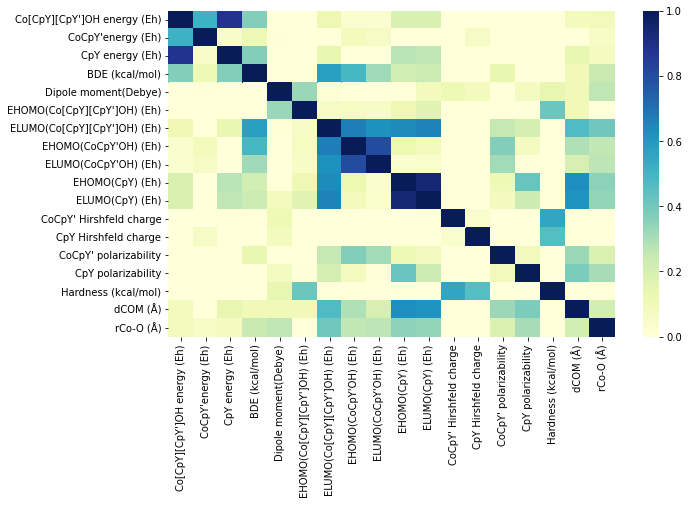

In [ ]:
corr = ml_df.corr()
plt.figure(figsize=[10,6])
sns.heatmap(corr, cmap="YlGnBu", vmin=0.0, vmax=1.0);

In [ ]:
sub= np.array(ml_df['CpY name'].value_counts().index)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matp

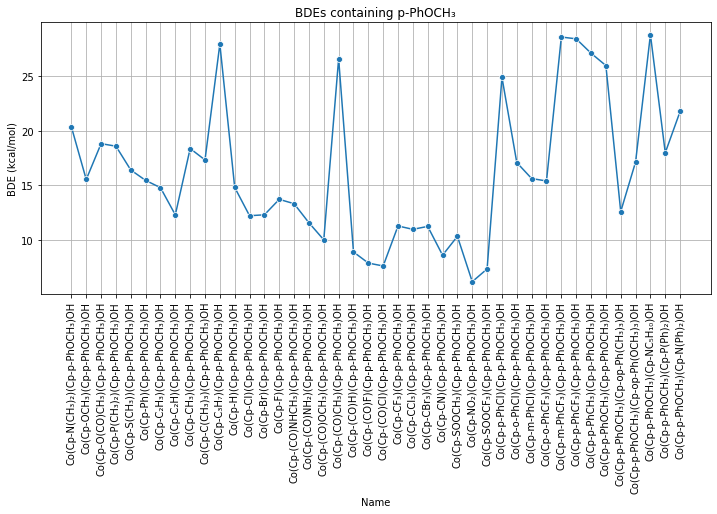

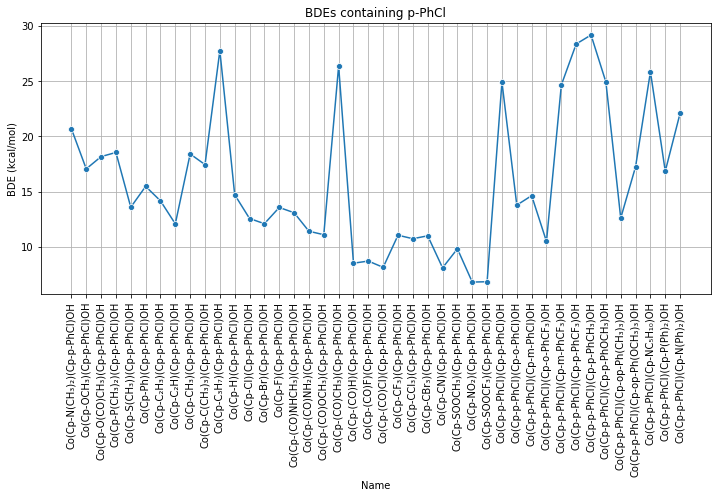

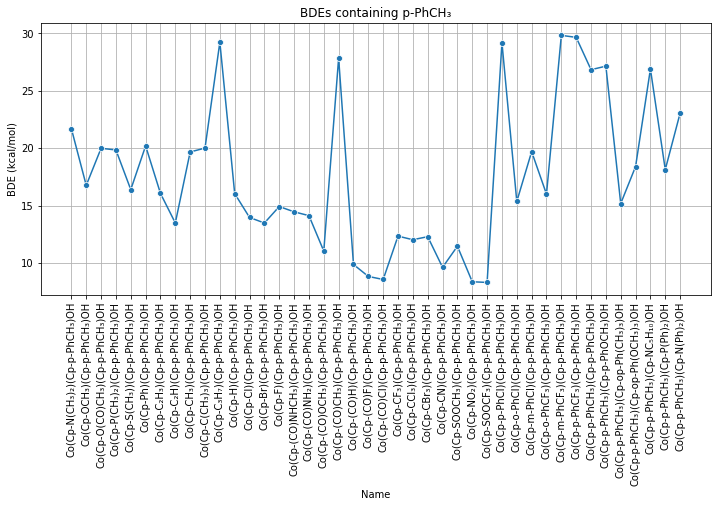

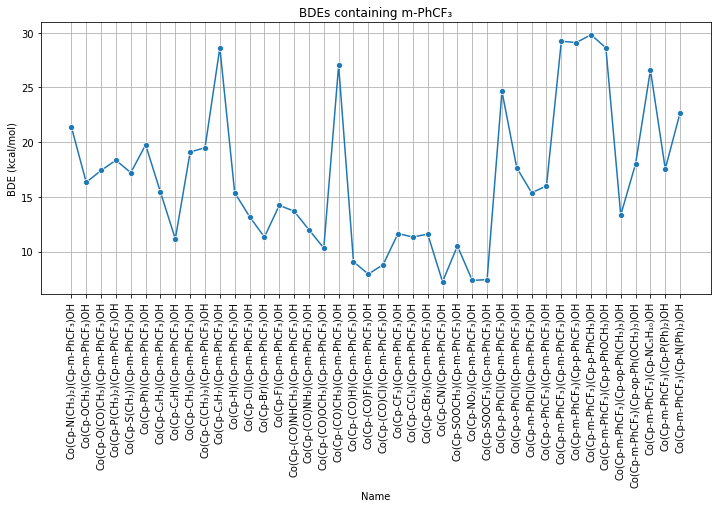

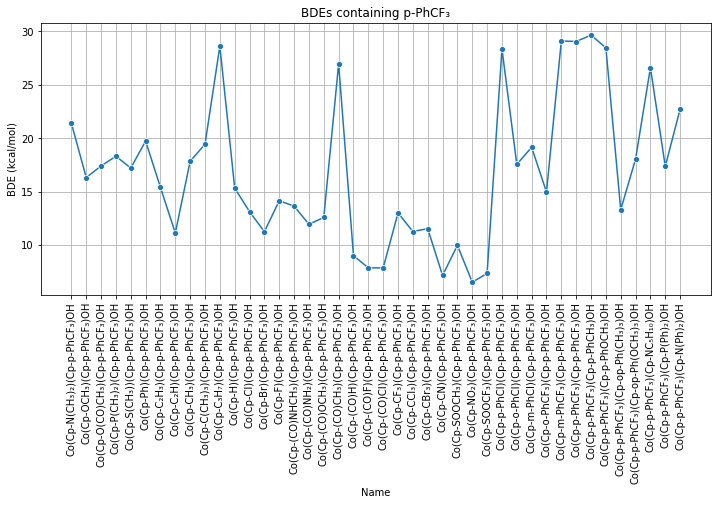

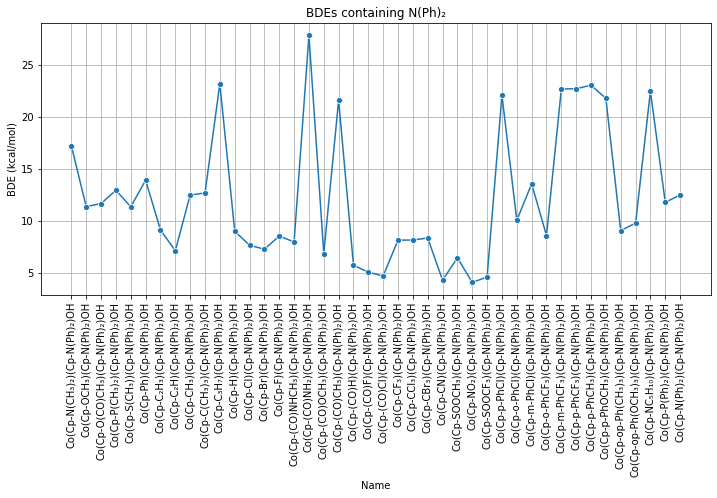

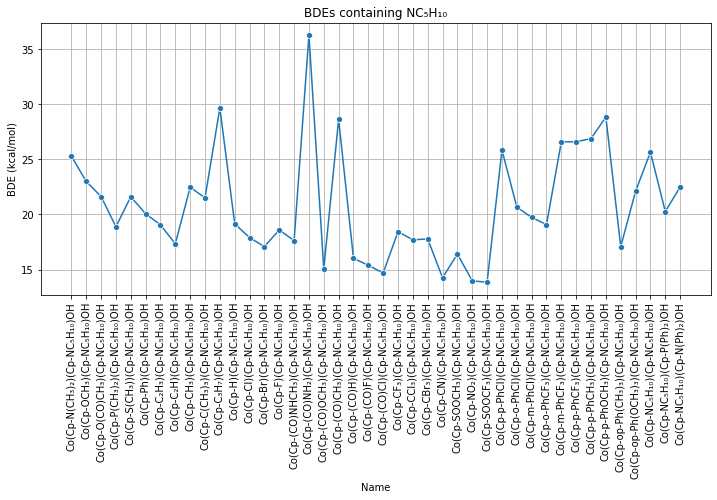

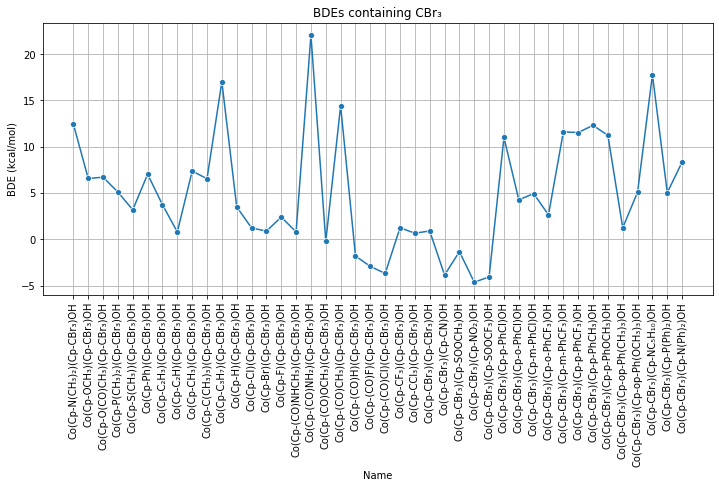

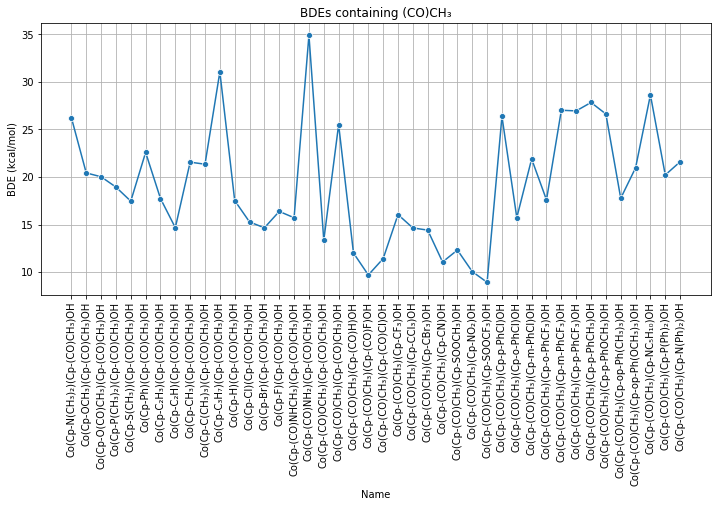

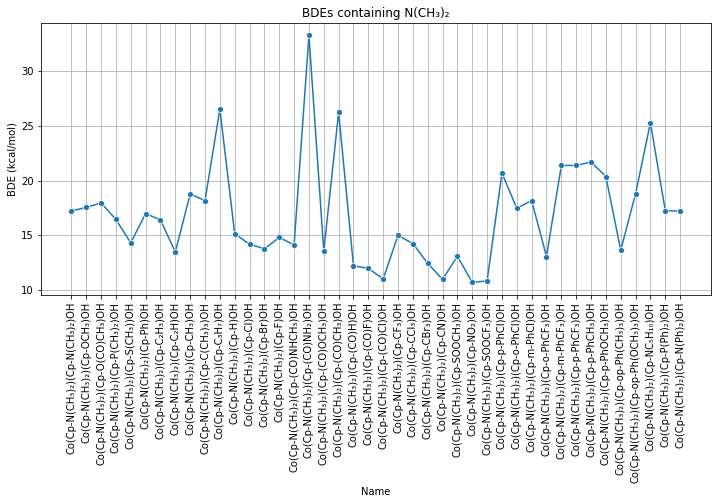

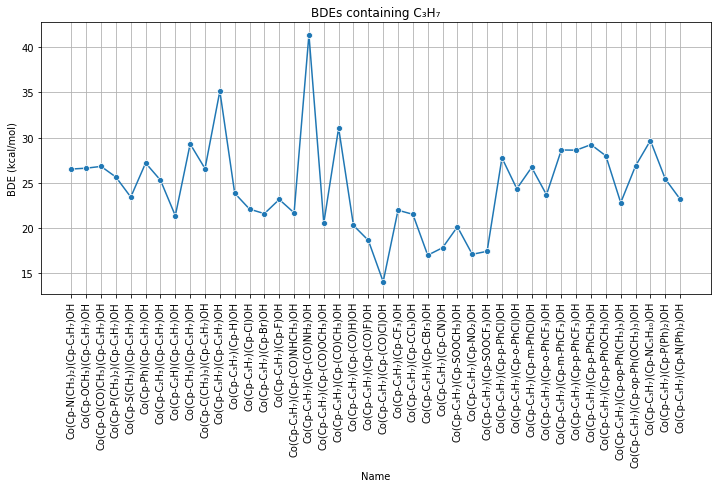

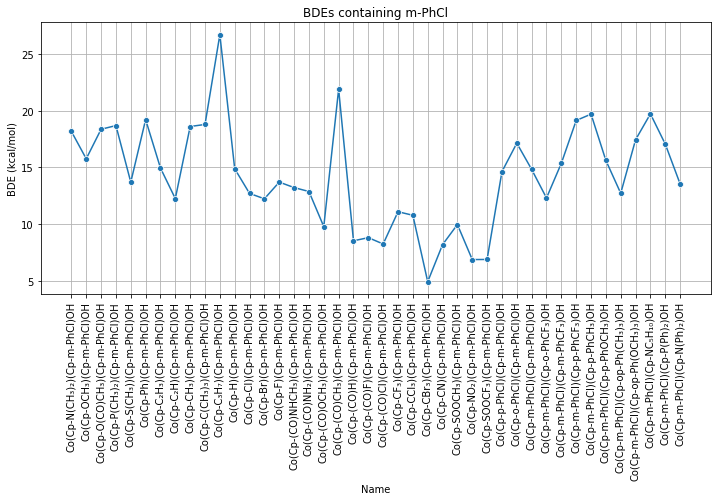

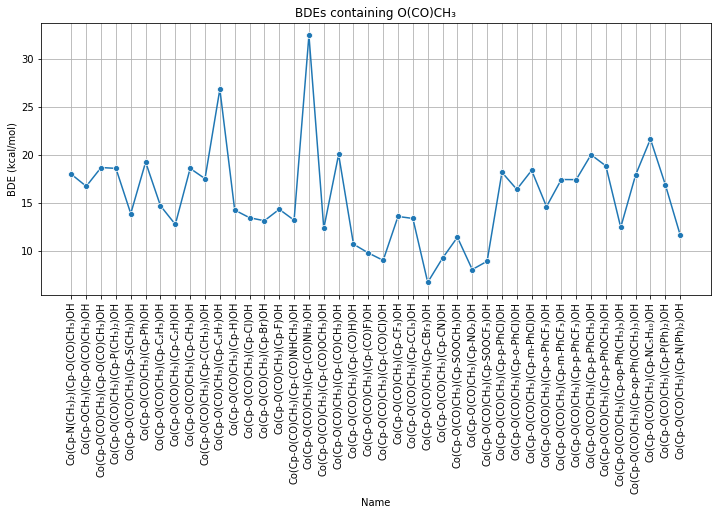

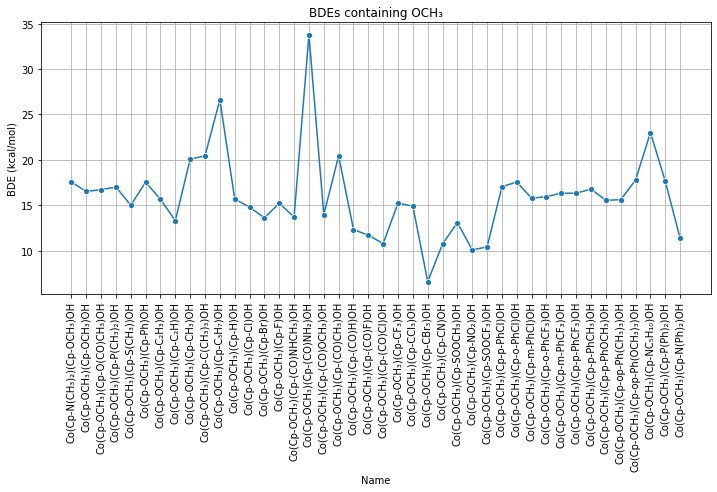

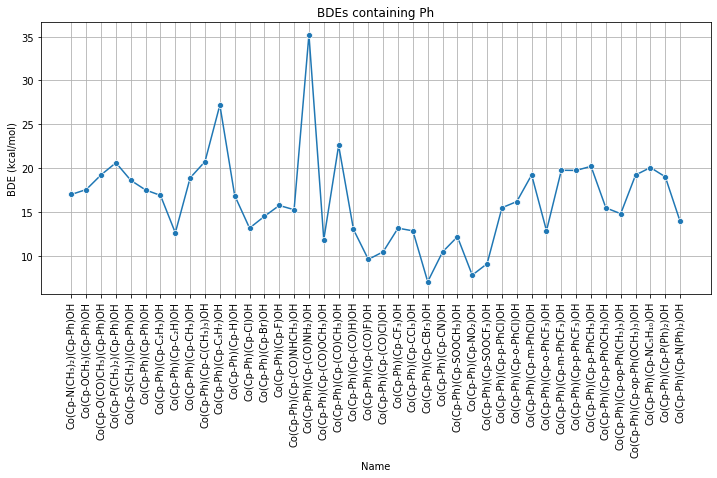

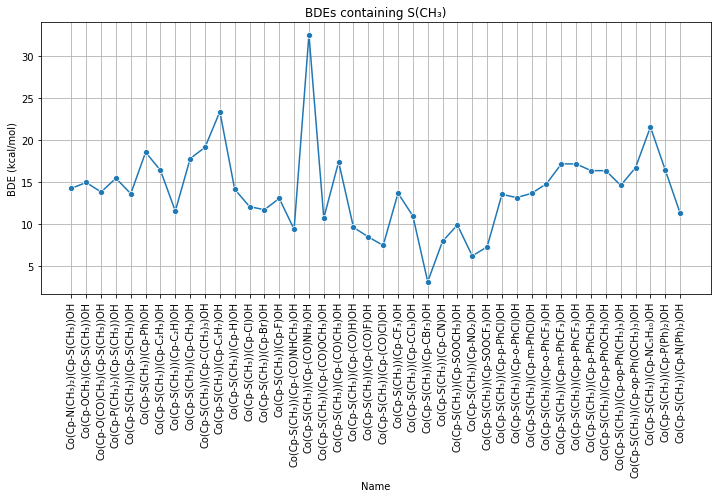

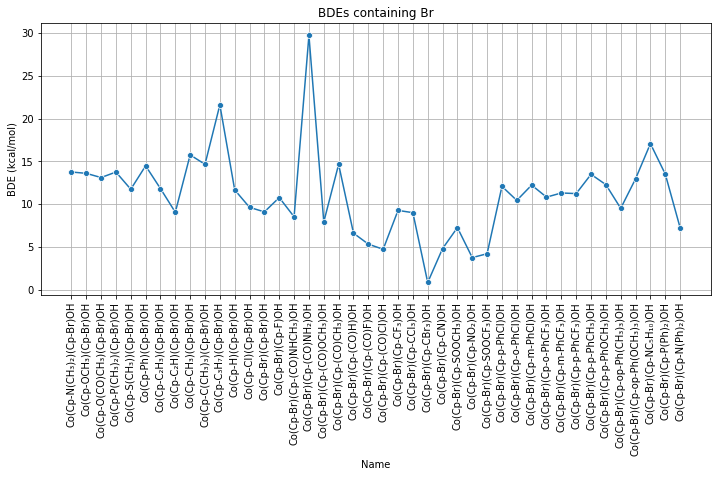

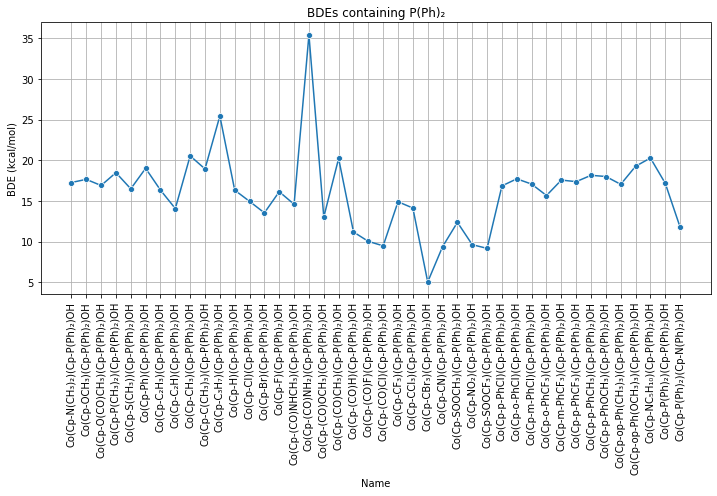

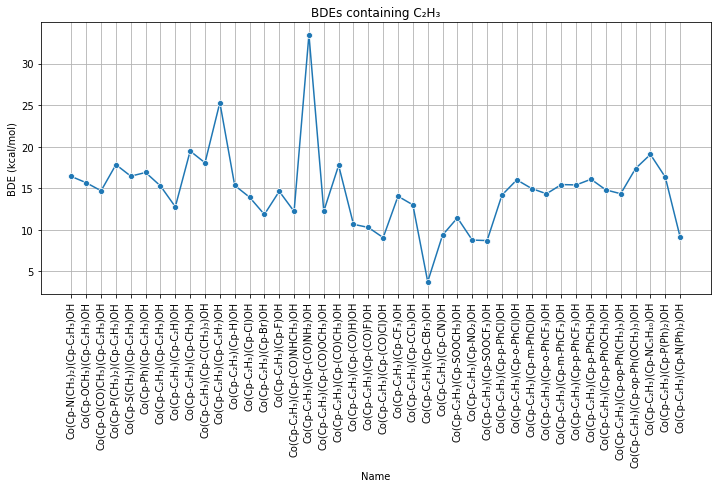

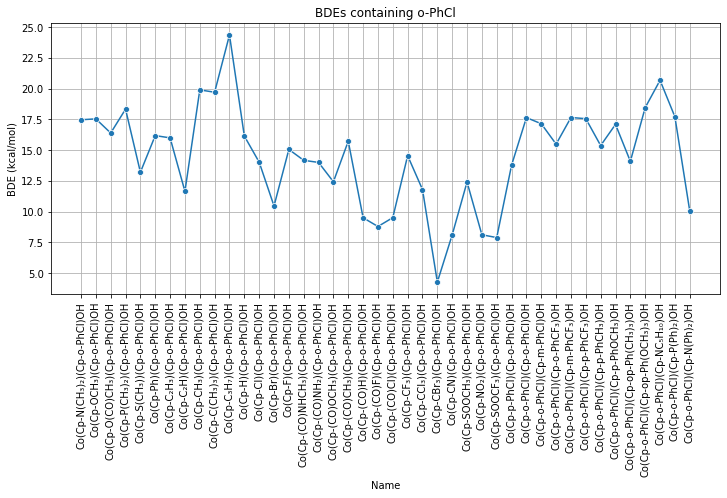

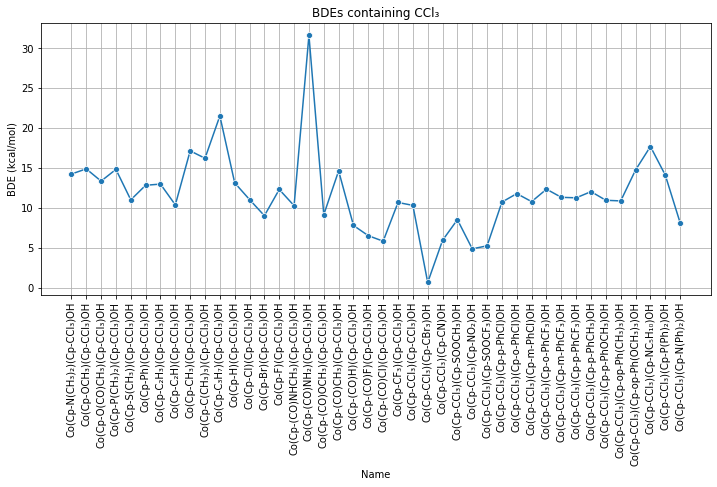

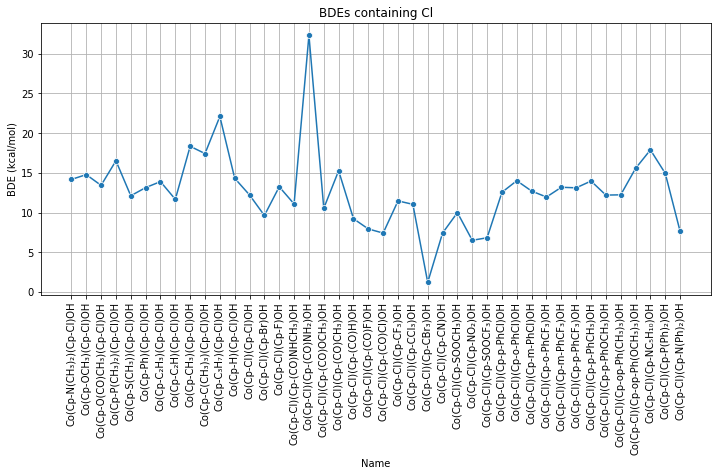

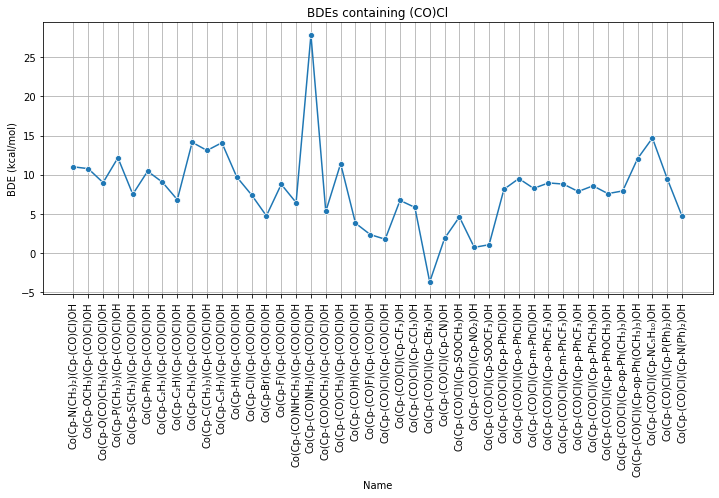

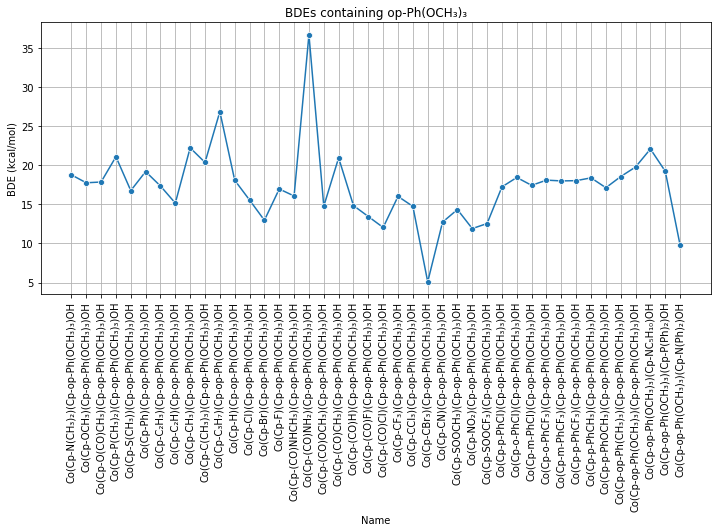

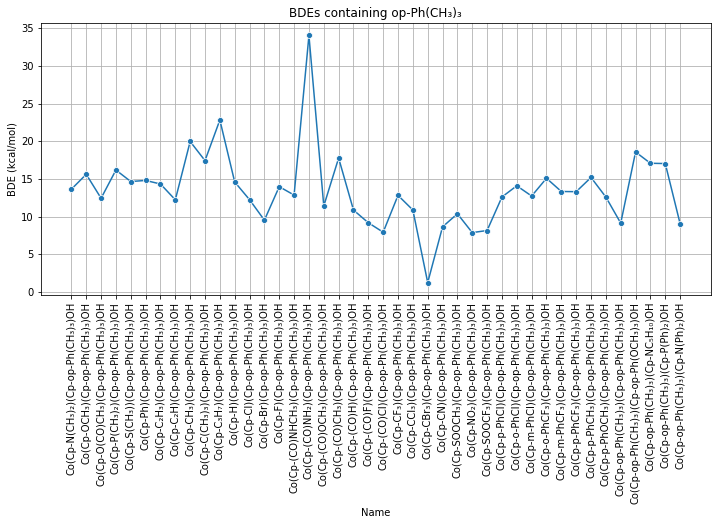

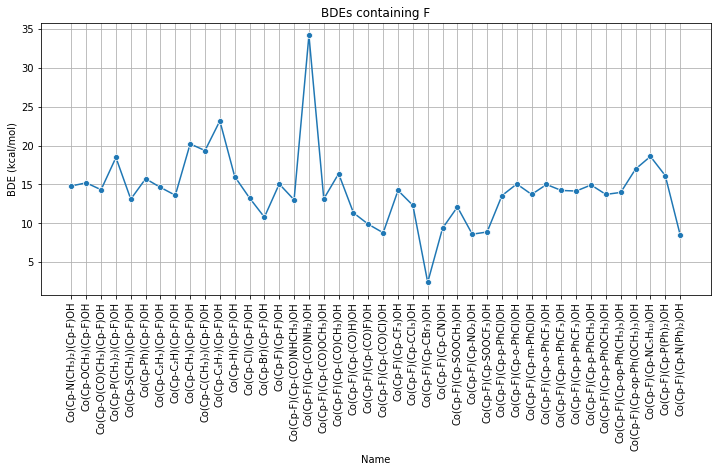

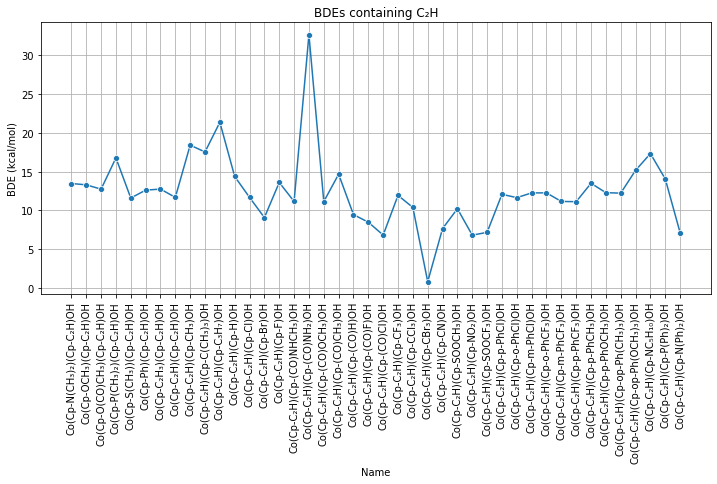

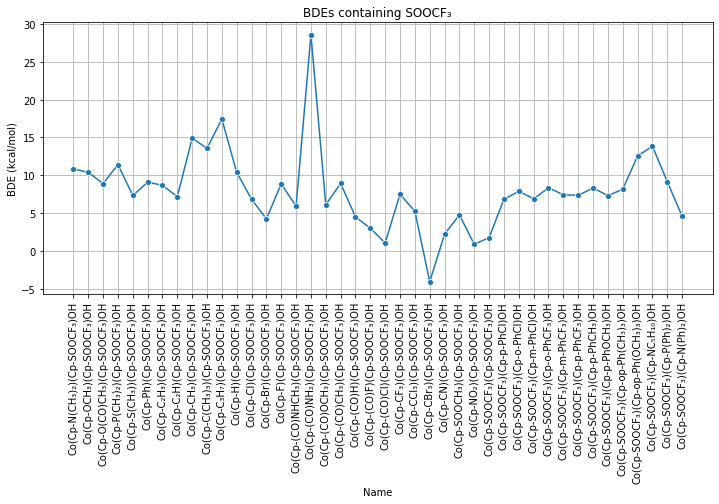

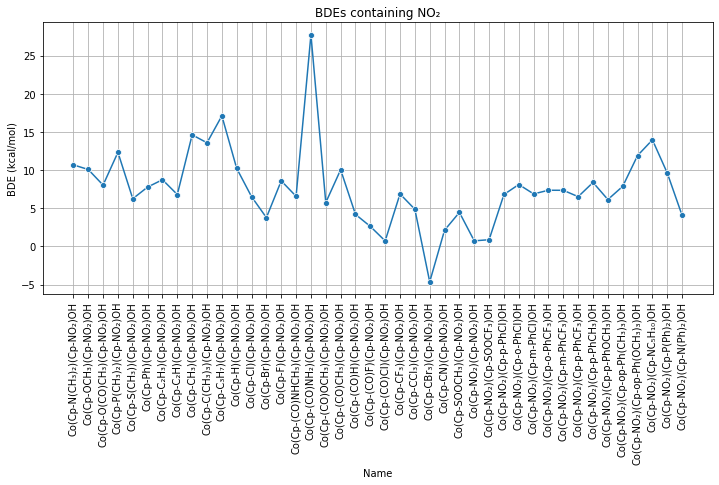

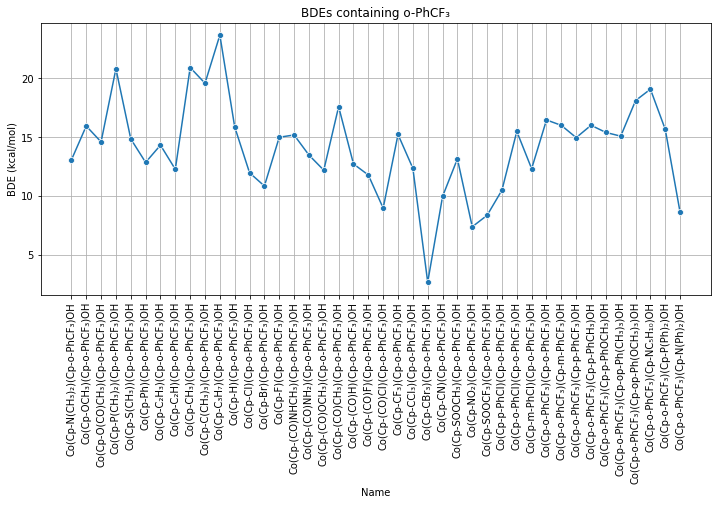

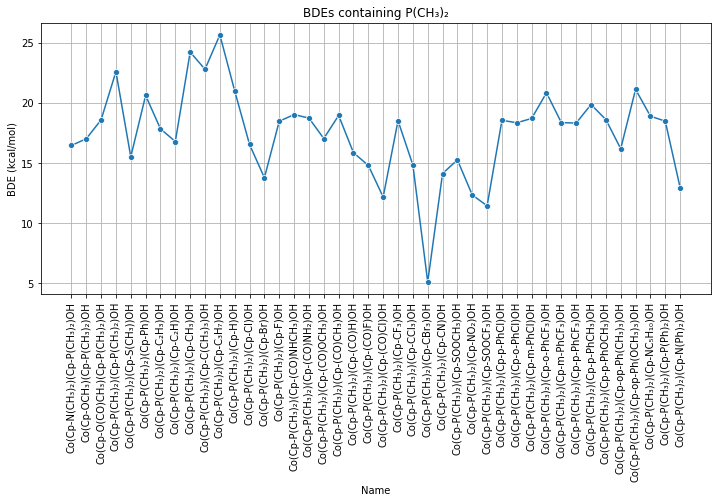

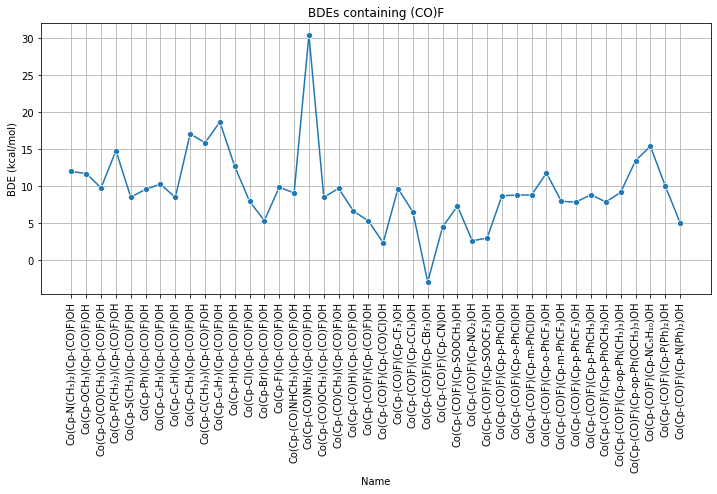

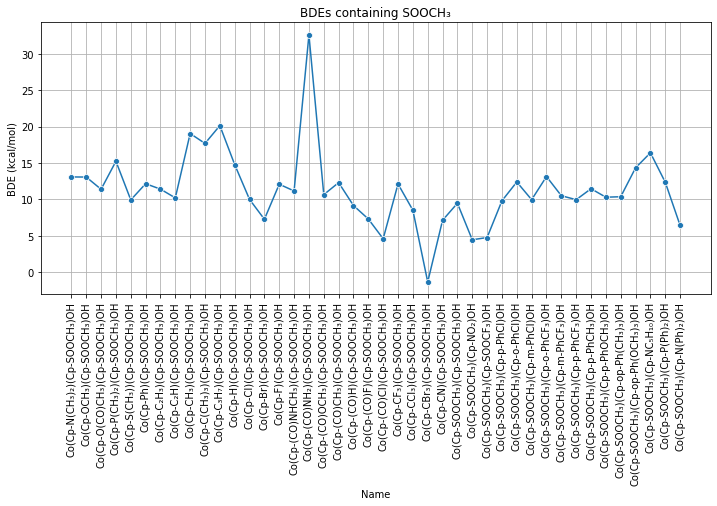

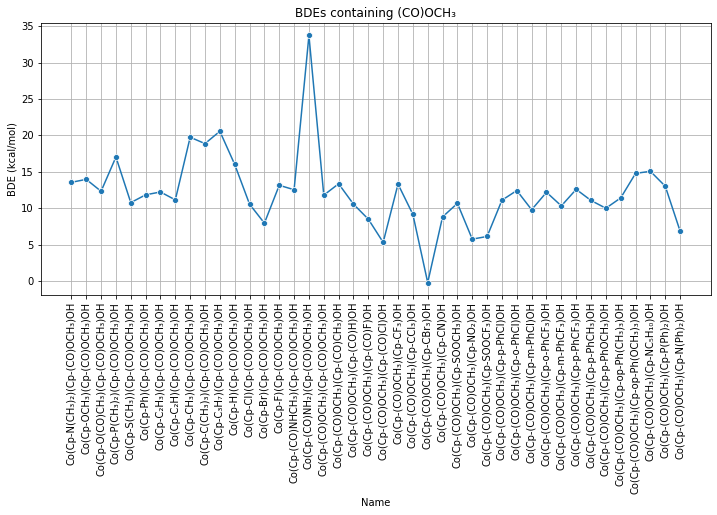

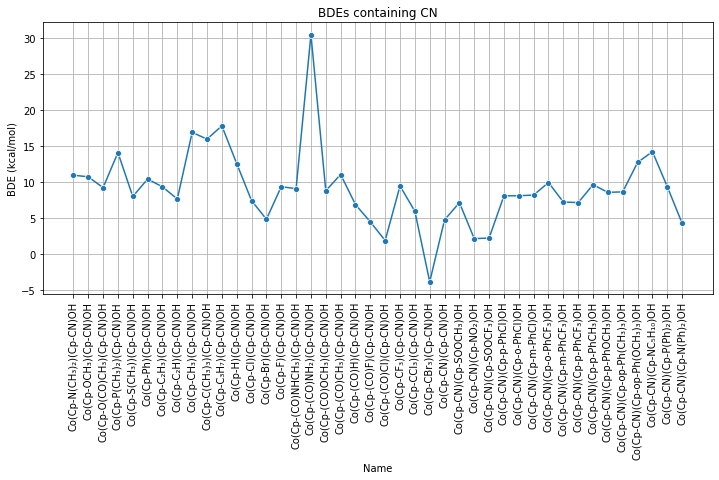

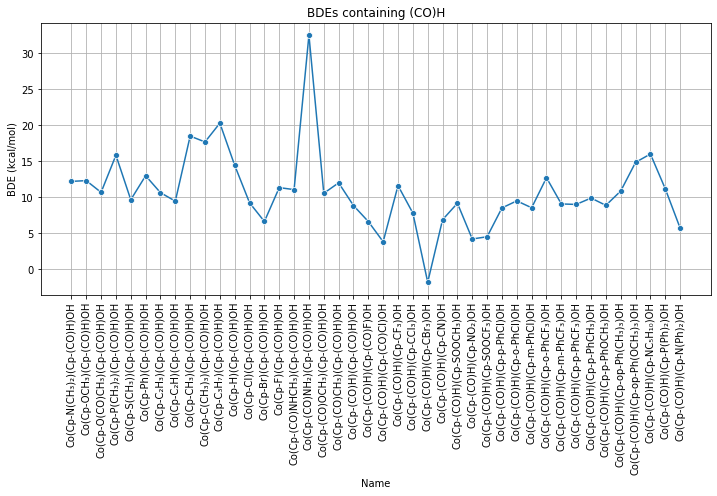

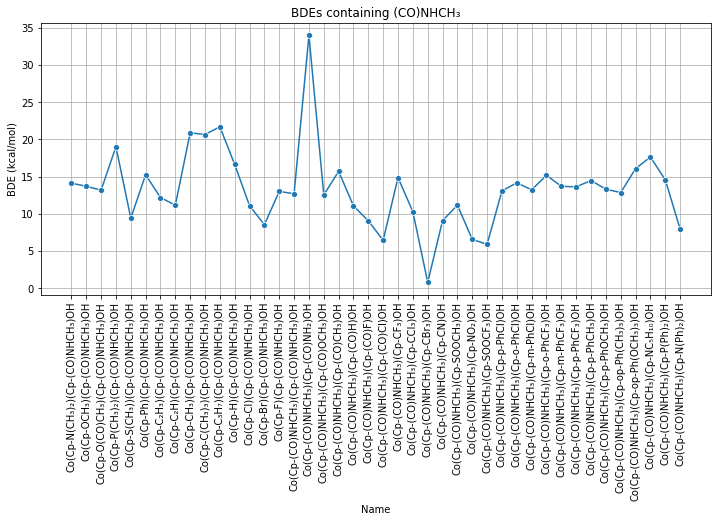

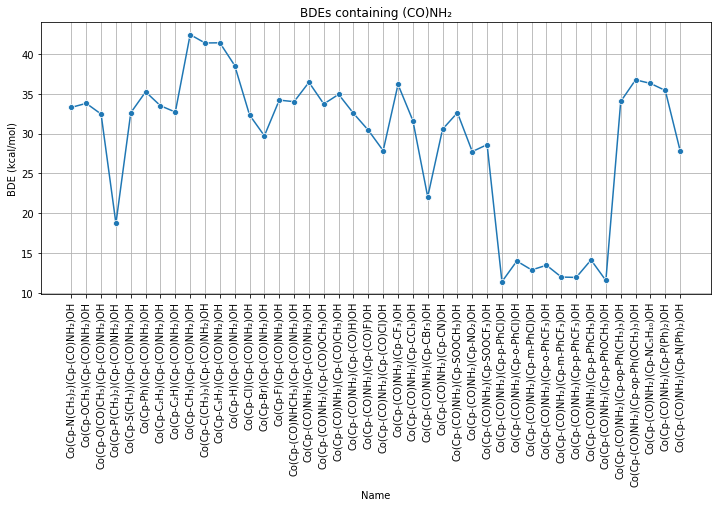

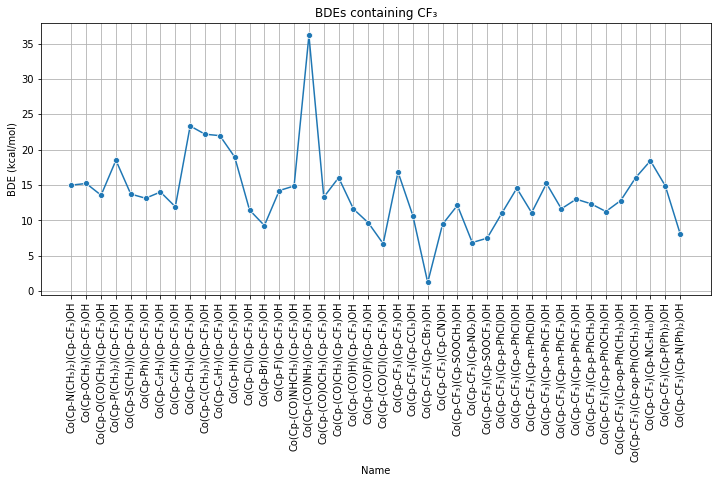

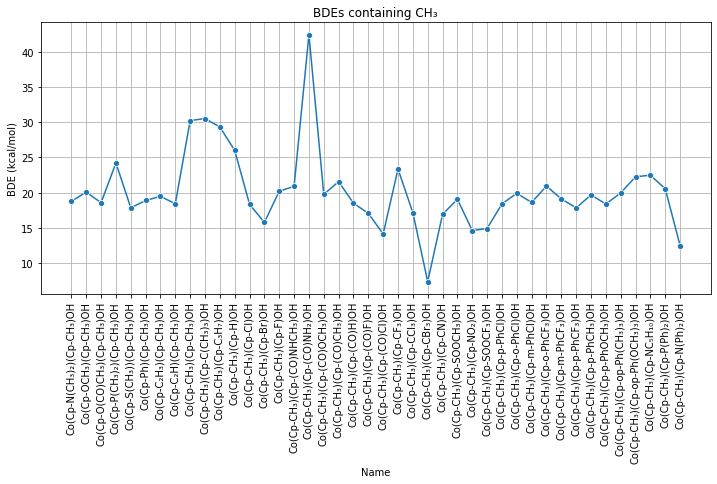

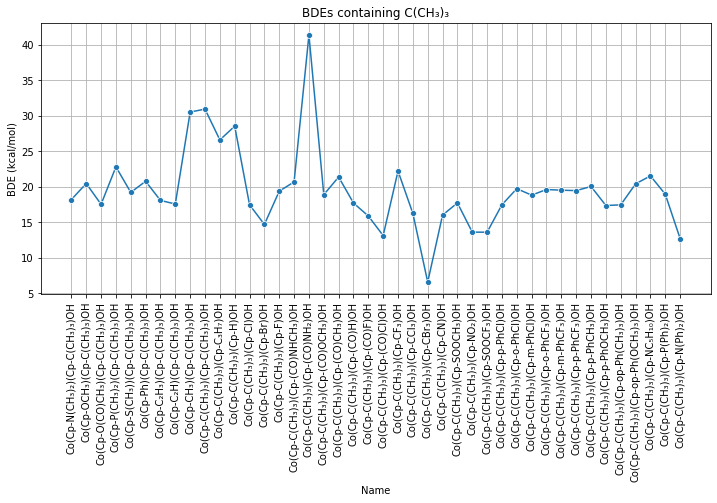

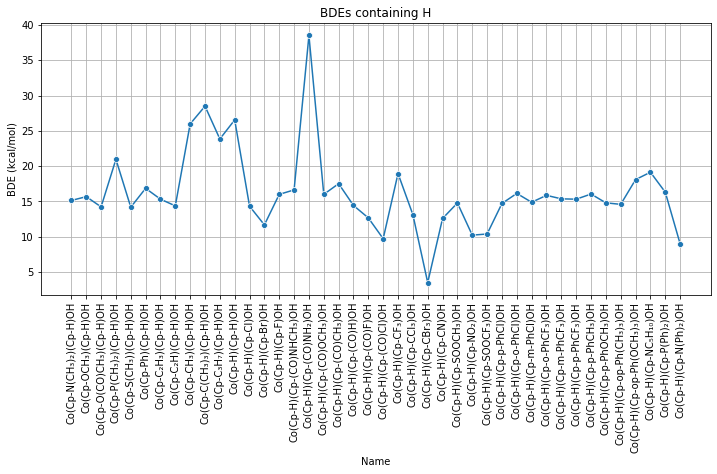

In [ ]:
for i in range(len(sub)):
  temp=ml_df[(ml_df["CoCpY' name"]==sub[i])|(ml_df['CpY name']==sub[i])]
  plt.figure(figsize=(12,5))
  sns.lineplot(data=temp, x='Name', y='BDE (kcal/mol)',marker='o', dashes=True)
  plt.title(f'BDEs containing {sub[i]}')
  plt.grid()
  plt.xticks(rotation=90);






    

#Filter Data

In [ ]:
#negative  BDE data
negative_bde = (ml_df[ml_df['BDE (kcal/mol)']<0])
len(negative_bde)

8

In [ ]:
negative_bde['Name']

585    Co(Cp-(CO)OCH₃)(Cp-CBr₃)OH
632       Co(Cp-(CO)H)(Cp-CBr₃)OH
654       Co(Cp-(CO)F)(Cp-CBr₃)OH
675      Co(Cp-(CO)Cl)(Cp-CBr₃)OH
733          Co(Cp-CBr₃)(Cp-CN)OH
734      Co(Cp-CBr₃)(Cp-SOOCH₃)OH
735         Co(Cp-CBr₃)(Cp-NO₂)OH
736      Co(Cp-CBr₃)(Cp-SOOCF₃)OH
Name: Name, dtype: object

In [ ]:
ml_df = ml_df[ml_df['BDE (kcal/mol)']>0]
len(ml_df)

895

#Statistics

In [ ]:
ml_df.describe()

Co[CpY][CpY']OH energy (Eh)  CoCpY'energy (Eh)  CpY energy (Eh)  \
count                   895.000000         895.000000       895.000000   
mean                  -2973.800203       -2087.858129      -885.918347   
std                    1596.118476         811.552938      1326.767662   
min                  -17363.759064       -9411.126546     -7952.631083   
25%                   -2896.442023       -2220.117477      -768.161154   
50%                   -2572.857190       -1879.885018      -542.529457   
75%                   -2285.318225       -1766.531474      -397.996994   
max                   -1845.520993       -1652.003971      -193.474683   

       BDE (kcal/mol)  Dipole moment(Debye)  EHOMO(Co[CpY][CpY']OH) (Eh)  \
count      895.000000            895.000000                   895.000000   
mean        14.888111             16.215268                    -0.191134   
std          6.883028              3.213190                     0.006246   
min          0.660082              4.493000                    -0.223500   
25%         10.379032             14.103550                    -0.191600   
50%         14.120994             16.501300                    -0.190000   
75%         18.155096             18.227550                    -0.188400   
max         42.413274             27.728700                    -0.180300   

       ELUMO(Co[CpY][CpY']OH) (Eh)  EHOMO(CoCpY'OH) (Eh)  \
count                   895.000000            895.000000   
mean                     -0.086499             -0.215140   
std                       0.011880              0.013232   
min                      -0.126100             -0.237800   
25%                      -0.093500             -0.224600   
50%                      -0.085100             -0.213300   
75%                      -0.078400             -0.205300   
max                      -0.054800             -0.171600   

       ELUMO(CoCpY'OH) (Eh)  EHOMO(CpY) (Eh)  ELUMO(CpY) (Eh)  \
count            895.000000       895.000000       895.000000   
mean              -0.085630        -0.201761        -0.118447   
std                0.008931         0.022281         0.016820   
min               -0.106800        -0.246900        -0.151300   
25%               -0.092000        -0.219000        -0.125600   
50%               -0.085100        -0.201000        -0.118300   
75%               -0.079400        -0.189900        -0.112600   
max               -0.063300        -0.155200        -0.076800   

       CoCpY' Hirshfeld charge  CpY Hirshfeld charge  CoCpY' polarizability  \
count               895.000000            895.000000             895.000000   
mean                  0.036246              0.022140              32.410054   
std                   0.062785              0.052145              29.755821   
min                  -0.081960             -0.081960               0.265420   
25%                  -0.024960             -0.011530              12.952910   
50%                   0.038080              0.011965              24.041310   
75%                   0.081263              0.062475              43.981350   
max                   0.160449              0.160449             150.643000   

       CpY polarizability  Hardness (kcal/mol)    dCOM (Å)   rCo-O (Å)  
count          895.000000           895.000000  895.000000  895.000000  
mean            48.671381           -32.829503    3.300610    4.005793  
std             33.589449             4.082566    0.010079    0.158931  
min              0.265420           -46.529125    3.282637    3.691918  
25%             22.669890           -35.296875    3.292889    3.892920  
50%             52.745580           -33.006500    3.298022    3.991676  
75%             60.200450           -30.323937    3.305600    4.100923  
max            150.643000           -21.366375    3.337480    4.725310

In [ ]:
#checking for duplicates
ml_df.duplicated().sum()

0

In [ ]:
#checking for missing values
ml_df.isna().sum().sum()

0

In [ ]:
ml_df.head()

Name  Co[CpY][CpY']OH energy (Eh) CoCpY' name  \
0   Co(Cp-N(CH₃)₂)(Cp-N(CH₃)₂)OH                 -2113.503825     N(CH₃)₂   
1      Co(Cp-N(CH₃)₂)(Cp-OCH₃)OH                 -2094.048389        OCH₃   
2  Co(Cp-N(CH₃)₂)(Cp-O(CO)CH₃)OH                 -2207.402596    O(CO)CH₃   
3   Co(Cp-N(CH₃)₂)(Cp-P(CH₃)₂)OH                 -2400.122408     P(CH₃)₂   
4    Co(Cp-N(CH₃)₂)(Cp-S(CH₃))OH                 -2417.026291      S(CH₃)   

   CoCpY'energy (Eh) CpY name  CpY energy (Eh)  BDE (kcal/mol)  \
0       -1785.987408  N(CH₃)₂      -327.488954       17.233174   
1       -1766.531474  N(CH₃)₂      -327.488954       17.545539   
2       -1879.885018  N(CH₃)₂      -327.488954       17.961810   
3       -2072.607246  N(CH₃)₂      -327.488954       16.445457   
4       -2089.514536  N(CH₃)₂      -327.488954       14.308038   

   Dipole moment(Debye)  EHOMO(Co[CpY][CpY']OH) (Eh)  \
0               15.5954                      -0.1803   
1               14.9760                      -0.1867   
2               18.7135                      -0.1849   
3               19.9044                      -0.1862   
4               14.9101                      -0.1868   

   ELUMO(Co[CpY][CpY']OH) (Eh)  ...  ELUMO(CoCpY'OH) (Eh)  EHOMO(CpY) (Eh)  \
0                      -0.0555  ...               -0.0719          -0.1594   
1                      -0.0607  ...               -0.0727          -0.1594   
2                      -0.0667  ...               -0.0855          -0.1594   
3                      -0.0659  ...               -0.0814          -0.1594   
4                      -0.0654  ...               -0.0817          -0.1594   

   ELUMO(CpY) (Eh)  CoCpY' Hirshfeld charge  CpY Hirshfeld charge  \
0          -0.0809                 0.011840               0.01184   
1          -0.0809                -0.015190               0.01184   
2          -0.0809                 0.071736               0.01184   
3          -0.0809                -0.059590               0.01184   
4          -0.0809                 0.019722               0.01184   

   CoCpY' polarizability  CpY polarizability  Hardness (kcal/mol)  dCOM (Å)  \
0               27.53932            27.53932           -39.156000  3.337480   
1               18.01558            27.53932           -39.532500  3.314513   
2               27.13368            27.53932           -37.085250  3.312872   
3               43.11939            27.53932           -37.744125  3.333984   
4               27.96205            27.53932           -38.089250  3.328151   

   rCo-O (Å)  
0   3.856084  
1   4.150980  
2   4.065847  
3   4.033683  
4   3.818543  

[5 rows x 21 columns]

In [ ]:
ml_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 895 entries, 0 to 902
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Name                         895 non-null    object 
 1   Co[CpY][CpY']OH energy (Eh)  895 non-null    float64
 2   CoCpY' name                  895 non-null    object 
 3   CoCpY'energy (Eh)            895 non-null    float64
 4   CpY name                     895 non-null    object 
 5   CpY energy (Eh)              895 non-null    float64
 6   BDE (kcal/mol)               895 non-null    float64
 7   Dipole moment(Debye)         895 non-null    float64
 8   EHOMO(Co[CpY][CpY']OH) (Eh)  895 non-null    float64
 9   ELUMO(Co[CpY][CpY']OH) (Eh)  895 non-null    float64
 10  EHOMO(CoCpY'OH) (Eh)         895 non-null    float64
 11  ELUMO(CoCpY'OH) (Eh)         895 non-null    float64
 12  EHOMO(CpY) (Eh)              895 non-null    float64
 13  ELUMO(CpY) (Eh)     

#Validate Split

In [ ]:
y = ml_df['BDE (kcal/mol)']
X = ml_df[["EHOMO(CoCpY'OH) (Eh)", "ELUMO(CoCpY'OH) (Eh)", "EHOMO(CpY) (Eh)", "ELUMO(CpY) (Eh)", "CoCpY' Hirshfeld charge", "CpY Hirshfeld charge"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [ ]:
X_train

EHOMO(CoCpY'OH) (Eh)  ELUMO(CoCpY'OH) (Eh)  EHOMO(CpY) (Eh)  \
817               -0.2024               -0.0999          -0.1966   
247               -0.2209               -0.0867          -0.2029   
636               -0.2277               -0.0920          -0.2469   
305               -0.2104               -0.0851          -0.1552   
316               -0.2053               -0.0778          -0.2213   
..                    ...                   ...              ...   
106               -0.2297               -0.0944          -0.2092   
270               -0.2003               -0.0802          -0.1552   
868               -0.2024               -0.0999          -0.1899   
435               -0.2131               -0.0789          -0.1552   
102               -0.2346               -0.0965          -0.2092   

     ELUMO(CpY) (Eh)  CoCpY' Hirshfeld charge  CpY Hirshfeld charge  
817          -0.1211                 0.024095              0.011965  
247          -0.1147                 0.038080              0.008470  
636          -0.1496                 0.081263              0.132226  
305          -0.0768                 0.072356             -0.081960  
316          -0.1320                -0.024960              0.038080  
..               ...                      ...                   ...  
106          -0.1170                 0.156189              0.071736  
270          -0.0768                 0.008470             -0.081960  
868          -0.1160                 0.024095             -0.007120  
435          -0.0768                -0.050620             -0.081960  
102          -0.1170                 0.121657              0.071736  

[671 rows x 6 columns]

#Functions

## Evaluvation

In [ ]:
#function for evaluation
def eval_model(pipe, X_train=X_train, y_train=y_train, X_test=X_test , y_test= y_test):
  eval_results = pd.DataFrame(columns = ['Metrics','Train Score', 'Test Score'])
  train_mae = mean_absolute_error(y_train, pipe.predict(X_train))
  test_mae = mean_absolute_error(y_test, pipe.predict(X_test))

  train_mse = mean_squared_error(y_train, pipe.predict(X_train))
  test_mse = mean_squared_error(y_test, pipe.predict(X_test))

  train_rmse = np.sqrt(train_mse)
  test_rmse = np.sqrt(test_mse)

  train_r2 = r2_score(y_train, pipe.predict(X_train))
  test_r2 = r2_score(y_test, pipe.predict(X_test))

  eval_results.loc[1, 'Metrics'] = 'MAE'
  eval_results.loc[2, 'Metrics'] = 'MSE'
  eval_results.loc[3, 'Metrics'] = 'RMSE'
  eval_results.loc[4, 'Metrics'] = 'R2'

  eval_results.loc[1, 'Train Score'] = train_mae
  eval_results.loc[2, 'Train Score'] = train_mse
  eval_results.loc[3, 'Train Score'] = train_rmse
  eval_results.loc[4, 'Train Score'] = train_r2

  eval_results.loc[1, 'Test Score'] = test_mae
  eval_results.loc[2, 'Test Score'] = test_mse
  eval_results.loc[3, 'Test Score'] = test_rmse
  eval_results.loc[4, 'Test Score'] = test_r2

  return eval_results

## Plot

In [ ]:
def train_test_plot(model_name, pipe,  X_train=X_train, y_train=y_train, X_test=X_test , y_test= y_test):
  fig, axes = plt.subplots(nrows = 1, ncols=2, figsize=(12,4))
#subplot1
  ax = sns.regplot(x = y_train, 
                   y = pipe.predict(X_train), 
                   line_kws = {'color':'black', 'ls': ':', 'label' :f'R$^2$ = {round(r2_score(y_train, pipe.predict(X_train)), 6)}'}, 
                   ax=axes[0],
                   )
  axes[0].set_title('Train Data', fontweight = 'bold')
  axes[0].set_xlabel('Actual BDE (kcal/mol)')
  axes[0].set_ylabel('Predicted BDE (kcal/mol)');

#subplot2
  ax = sns.regplot(x = y_test, 
                   y = pipe.predict(X_test), 
                   line_kws = {'color':'black', 'ls': ':', 
                   'label' : f'R$^2$ = {round(r2_score(y_test, pipe.predict(X_test)), 6)}'}, 
                   ax=axes[1])
  axes[1].set_title('Test Data', fontweight = 'bold')
  axes[1].set_xlabel('Actual BDE (kcal/mol)')
  axes[1].set_ylabel('Predicted BDE (kcal/mol)')
  
  fig.suptitle(f'Train and Test Results of {model_name}', fontsize = 20, fontweight = 'bold', y = 1.1)
  [ax.legend() for ax in axes];
  return (fig, axes)

#Data Preprocessing

## Instantiate colimn transformers

In [ ]:
scaler = StandardScaler()

# Linear Regression Model

In [ ]:
lr = LinearRegression()
lr_pipe = make_pipeline(scaler, lr)
lr_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [ ]:
#evaluvation of linear rigression
eval_model(lr_pipe)

Metrics Train Score Test Score
1     MAE    3.143873   3.042798
2     MSE   26.866038  22.578746
3    RMSE    5.183246    4.75171
4      R2     0.43733   0.508394

(<Figure size 864x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0239ad9fd0>,
       dtype=object))

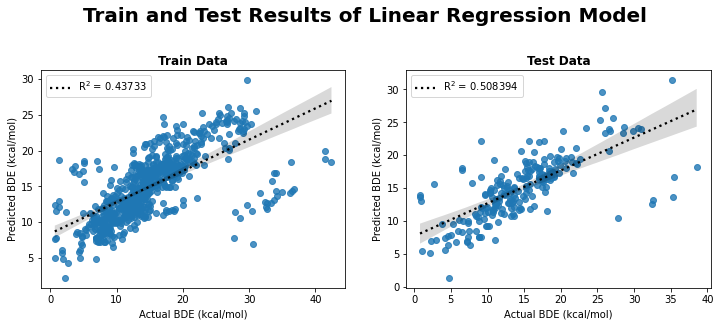

In [ ]:
train_test_plot('Linear Regression Model', lr_pipe)

#Decision Tree Model

## Initial Model

In [ ]:
dt = DecisionTreeRegressor(random_state = 42)
dt_pipe = make_pipeline(scaler, dt)
dt_pipe.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [ ]:
#evaluvation of initial decision tree
eval_model(dt_pipe)

Metrics Train Score Test Score
1     MAE         0.0    1.92601
2     MSE         0.0  11.816458
3    RMSE         0.0   3.437508
4      R2         1.0   0.742721

(<Figure size 864x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0236fdbe90>,
       dtype=object))

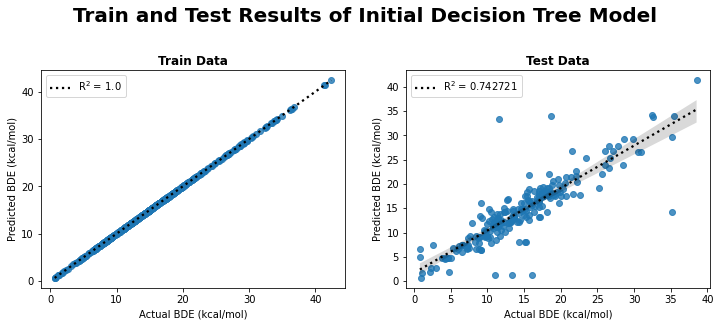

In [ ]:
train_test_plot('Initial Decision Tree Model', dt_pipe)

## Tuning the model

In [ ]:
#checking the defaut parameters
dt.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [ ]:
#max_depth value
depth_max = dt.get_depth()

In [ ]:
depths = range(1,depth_max+1)
dt_scores = pd.DataFrame(index = depths, columns = ['Train Score', 'Test Score'])
for depth in depths:
  dt_temp = DecisionTreeRegressor(random_state = 42, max_depth = depth)
  dt_temp_pipe = make_pipeline(scaler, dt_temp)
  dt_temp_pipe.fit(X_train, y_train)
  dt_temp_train_score = dt_temp_pipe.score(X_train, y_train)
  dt_temp_test_score = dt_temp_pipe.score(X_test, y_test)
  dt_scores.loc[depth, 'Train Score'] = dt_temp_train_score
  dt_scores.loc[depth, 'Test Score'] = dt_temp_test_score

In [ ]:
dt_scores.head()

Train Score Test Score
1    0.290891   0.210147
2    0.397556   0.350301
3    0.611674   0.534239
4    0.692408   0.639512
5    0.778359   0.655509

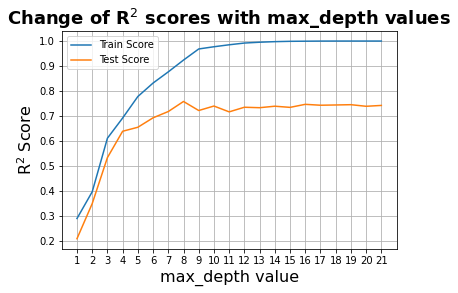

In [ ]:
plt.plot(depths, dt_scores['Train Score'], label = 'Train Score')
plt.plot(depths, dt_scores['Test Score'], label = 'Test Score')
plt.xlabel('max_depth value', fontsize = 16)
plt.ylabel('R$^2$ Score', fontsize = 16)
plt.title('Change of R$^2$ scores with max_depth values', fontweight = 'bold', fontsize = 18)
plt.xticks(depths)
plt.grid()
plt.legend()

In [ ]:
dt_scores = dt_scores.sort_values(by = 'Test Score', ascending = False)
dt_scores.head()

Train Score Test Score
8     0.923976   0.758514
16    0.999423    0.74709
19    0.999999   0.745676
18    0.999981   0.744535
17    0.999853   0.743523

## Optimized Model

In [ ]:
dt_opt = DecisionTreeRegressor(random_state = 42, max_depth = 8)
dt_opt_pipe = make_pipeline(scaler, dt_opt)
dt_opt_pipe.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(max_depth=8, random_state=42))])

In [ ]:
#evaluvation of optimized decision tree
eval_model(dt_opt_pipe)

Metrics Train Score Test Score
1     MAE    1.134395   2.192618
2     MSE    3.629928  11.091069
3    RMSE    1.905237   3.330326
4      R2    0.923976   0.758514

(<Figure size 864x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0235e5abd0>,
       dtype=object))

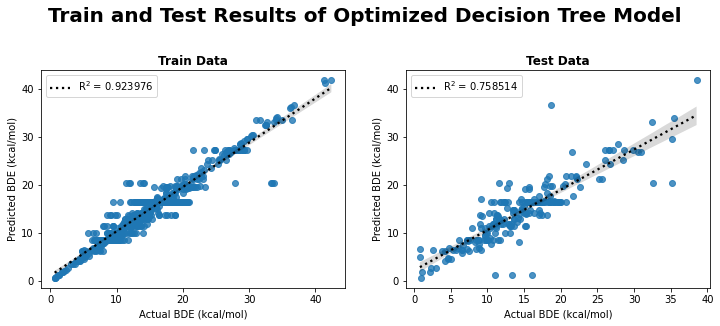

In [ ]:
train_test_plot('Optimized Decision Tree Model', dt_opt_pipe)

#Bagged Tree Model

##Initial Model

In [ ]:
bt = BaggingRegressor(random_state = 42)
bt_pipe = make_pipeline(scaler, bt)
bt_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('baggingregressor', BaggingRegressor(random_state=42))])

In [ ]:
#evaluvation of initial bagged tree
eval_model(bt_pipe)

Metrics Train Score Test Score
1     MAE    0.644049   1.647958
2     MSE    1.036834   7.865901
3    RMSE     1.01825   2.804621
4      R2    0.978285   0.828736

(<Figure size 864x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f02394823d0>,
       dtype=object))

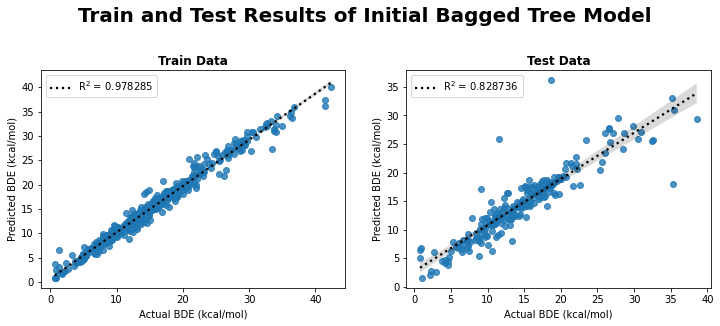

In [ ]:
train_test_plot('Initial Bagged Tree Model', bt_pipe)

## Tuning the model

In [ ]:
bt.get_params()

{'base_estimator': None,
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [ ]:
estimators = [10, 20, 30, 40, 50, 100, 150, 200]
bt_scores = pd.DataFrame(index = estimators, columns = ['Train Score', 'Test Score'])
for n_est in estimators:
  bt_temp = BaggingRegressor(random_state = 42, n_estimators= n_est)
  bt_temp_pipe = make_pipeline(scaler, bt_temp)
  bt_temp_pipe.fit(X_train, y_train)
  bt_temp_train_score = bt_temp_pipe.score(X_train, y_train)
  bt_temp_test_score = bt_temp_pipe.score(X_test, y_test)
  bt_scores.loc[n_est, 'Train Score'] = bt_temp_train_score
  bt_scores.loc[n_est, 'Test Score'] = bt_temp_test_score

In [ ]:
bt_scores.head()

Train Score Test Score
10    0.978285   0.828736
20    0.979621   0.829864
30    0.980691   0.833956
40    0.982318   0.833335
50    0.982911   0.839385

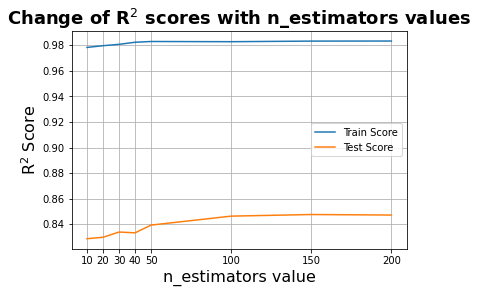

In [ ]:
plt.plot(estimators, bt_scores['Train Score'], label = 'Train Score')
plt.plot(estimators, bt_scores['Test Score'], label = 'Test Score')
plt.xlabel('n_estimators value', fontsize = 16)
plt.ylabel('R$^2$ Score', fontsize = 16)
plt.title('Change of R$^2$ scores with n_estimators values', fontweight = 'bold', fontsize = 18)
plt.xticks(estimators)
plt.grid()
plt.legend()

In [ ]:
bt_scores = bt_scores.sort_values(by = 'Test Score', ascending = False)
bt_scores.head()

Train Score Test Score
150    0.983221    0.84765
200    0.983269   0.847238
100    0.982753   0.846389
50     0.982911   0.839385
30     0.980691   0.833956

## Optimized Model

In [ ]:
bt_opt = BaggingRegressor(random_state = 42, n_estimators = 150)
bt_opt_pipe = make_pipeline(scaler, bt_opt)
bt_opt_pipe.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('baggingregressor',
                 BaggingRegressor(n_estimators=150, random_state=42))])

In [ ]:
#evaluvation of optimized bagged tree model
eval_model(bt_opt_pipe)

Metrics Train Score Test Score
1     MAE    0.551493   1.544467
2     MSE    0.801138   6.997215
3    RMSE    0.895063   2.645225
4      R2    0.983221    0.84765

(<Figure size 864x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0240715110>,
       dtype=object))

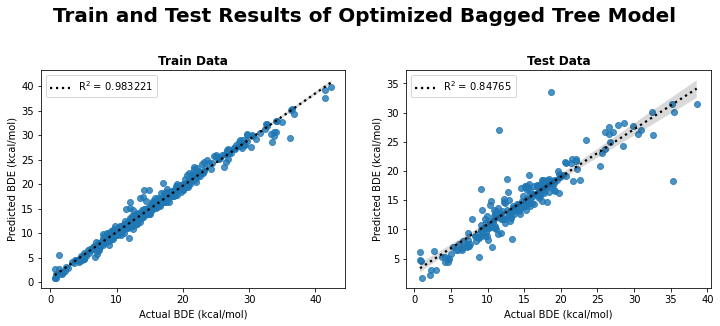

In [ ]:
train_test_plot('Optimized Bagged Tree Model', bt_opt_pipe)

# K-Nearest Neighbors Model

##Initial Model

In [ ]:
knn = KNeighborsRegressor()
knn_pipe = make_pipeline(scaler, knn)
knn_pipe.fit(X_train, y_train) 

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsregressor', KNeighborsRegressor())])

In [ ]:
#evaluvation of initial knn
eval_model(knn_pipe)

Metrics Train Score Test Score
1     MAE    2.262005   3.160452
2     MSE   13.290646  27.716321
3    RMSE    3.645634   5.264629
4      R2    0.721647   0.396533

(<Figure size 864x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f02358ab3d0>,
       dtype=object))

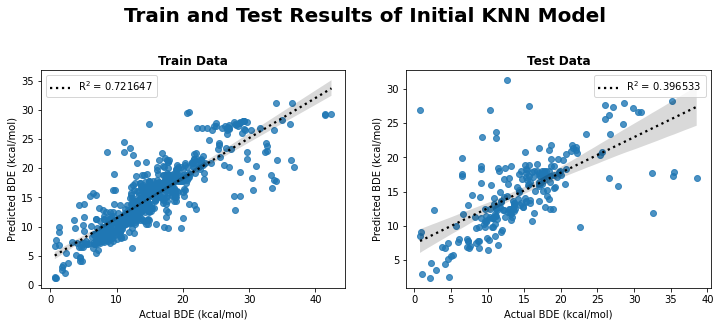

In [ ]:
train_test_plot('Initial KNN Model', knn_pipe)

## Tuning the Model

In [ ]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
neighbors = range(1,20)
knn_scores = pd.DataFrame(index = neighbors, columns = ['Train Score', 'Test Score'])
for n in neighbors:
  knn_temp = KNeighborsRegressor(n_neighbors = n)
  knn_temp_pipe = make_pipeline(scaler, knn_temp)
  knn_temp_pipe.fit(X_train, y_train)
  knn_temp_train_score = knn_temp_pipe.score(X_train, y_train)
  knn_temp_test_score = knn_temp_pipe.score(X_test, y_test)
  knn_scores.loc[n, 'Train Score'] = knn_temp_train_score
  knn_scores.loc[n, 'Test Score'] = knn_temp_test_score

In [ ]:
knn_scores.head()

Train Score Test Score
1         1.0   0.186083
2    0.824683   0.321735
3    0.780348   0.384258
4    0.734322   0.395952
5    0.721647   0.396533

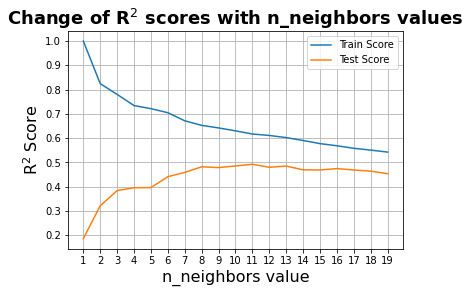

In [ ]:
plt.plot(neighbors, knn_scores['Train Score'], label = 'Train Score')
plt.plot(neighbors, knn_scores['Test Score'], label = 'Test Score')
plt.xlabel('n_neighbors value', fontsize = 16)
plt.ylabel('R$^2$ Score', fontsize = 16)
plt.title('Change of R$^2$ scores with n_neighbors values', fontweight = 'bold', fontsize = 18)
plt.xticks(neighbors)
plt.grid()
plt.legend()

In [ ]:
knn_scores = knn_scores.sort_values(by = 'Test Score', ascending = False)
knn_scores.head()

Train Score Test Score
11    0.617162   0.492607
10    0.630171   0.485639
13    0.602399   0.485254
8     0.652828    0.48218
12    0.611233   0.480166

## Optimized Model

In [ ]:
knn_opt = KNeighborsRegressor(n_neighbors= 11)
knn_opt_pipe = make_pipeline(scaler, knn_opt)
knn_opt_pipe.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsregressor', KNeighborsRegressor(n_neighbors=11))])

In [ ]:
#evaluvation of optimized KNN model
eval_model(knn_opt_pipe)

Metrics Train Score Test Score
1     MAE    2.721838   3.214807
2     MSE   18.279535  23.303788
3    RMSE    4.275457     4.8274
4      R2    0.617162   0.492607

(<Figure size 864x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f02381c0ed0>,
       dtype=object))

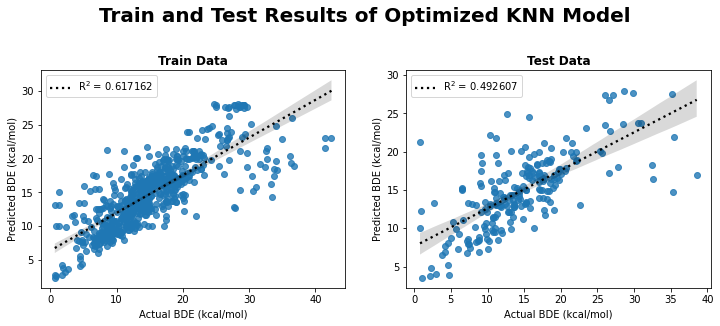

In [ ]:
train_test_plot('Optimized KNN Model', knn_opt_pipe)

# Random Forest Model

## Initial Model

In [ ]:
rf = RandomForestRegressor(random_state= 42)
rf_pipe = make_pipeline(scaler, rf)
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [ ]:
#evaluvation of initial bagged tree
eval_model(rf_pipe)

Metrics Train Score Test Score
1     MAE    0.566233   1.556835
2     MSE    0.829856   7.284421
3    RMSE    0.910965   2.698967
4      R2     0.98262   0.841397

(<Figure size 864x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0235dccc50>,
       dtype=object))

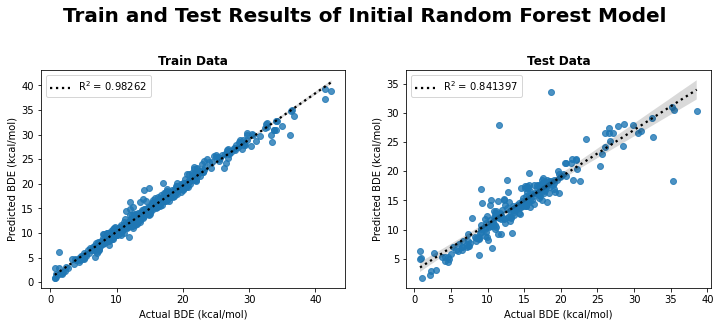

In [ ]:
train_test_plot('Initial Random Forest Model', rf_pipe)

## Tuning the Model

In [ ]:
#checking default parameters
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

### Tuning max_depth

In [ ]:
est_depth = [estimator.get_depth() for estimator in rf.estimators_]
max(est_depth)

24

In [ ]:
depths_rf = range(1, max(est_depth)+1)
rf_scores1 = pd.DataFrame(index = depths_rf, columns = ['Train Score', 'Test Score'])
for depth in depths_rf:
  rf_temp1 = RandomForestRegressor(random_state = 42, max_depth = depth)
  rf_temp1_pipe = make_pipeline(scaler, rf_temp1)
  rf_temp1_pipe.fit(X_train, y_train)
  rf_temp1_train_score = rf_temp1_pipe.score(X_train, y_train)
  rf_temp1_test_score = rf_temp1_pipe.score(X_test, y_test)
  rf_scores1.loc[depth, 'Train Score'] = rf_temp1_train_score
  rf_scores1.loc[depth, 'Test Score'] = rf_temp1_test_score

In [ ]:
rf_scores1.head()

Train Score Test Score
1    0.324261   0.241318
2    0.522158   0.454388
3    0.657368   0.610875
4    0.750818   0.701845
5    0.824171   0.752484

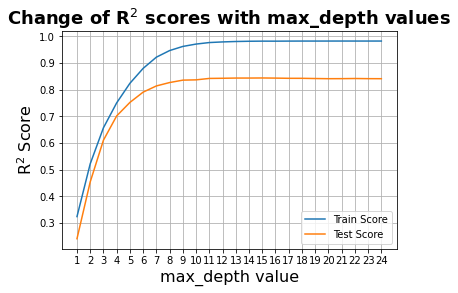

In [ ]:
plt.plot(depths_rf, rf_scores1['Train Score'], label = 'Train Score')
plt.plot(depths_rf, rf_scores1['Test Score'], label = 'Test Score')
plt.xlabel('max_depth value', fontsize = 16)
plt.ylabel('R$^2$ Score', fontsize = 16)
plt.title('Change of R$^2$ scores with max_depth values', fontweight = 'bold', fontsize = 18)
plt.xticks(depths_rf)
plt.grid()
plt.legend()

In [ ]:
rf_scores1 = rf_scores1.sort_values(by = 'Test Score', ascending = False)
rf_scores1.head()

Train Score Test Score
15    0.982268   0.844132
14    0.981821   0.843828
13    0.980914   0.843794
16    0.982171   0.843623
12    0.979322   0.842995

### Tuning n_estimators

In [ ]:
estimators_rf = [10, 20, 30, 40, 50, 100, 150, 200]
rf_scores2 = pd.DataFrame(index = estimators_rf, columns = ['Train Score', 'Test Score'])
for n_est in estimators_rf:
  rf_temp2 = RandomForestRegressor(random_state = 42, n_estimators= n_est, max_depth = 15)
  rf_temp2_pipe = make_pipeline(scaler, rf_temp2)
  rf_temp2_pipe.fit(X_train, y_train)
  rf_temp2_train_score = rf_temp2_pipe.score(X_train, y_train)
  rf_temp2_test_score = rf_temp2_pipe.score(X_test, y_test)
  rf_scores2.loc[n_est, 'Train Score'] = rf_temp2_train_score
  rf_scores2.loc[n_est, 'Test Score'] = rf_temp2_test_score

In [ ]:
rf_scores2.head()

Train Score Test Score
10    0.976013   0.826649
20    0.979012   0.830958
30    0.979897   0.832187
40    0.981395   0.830215
50    0.982015   0.836657

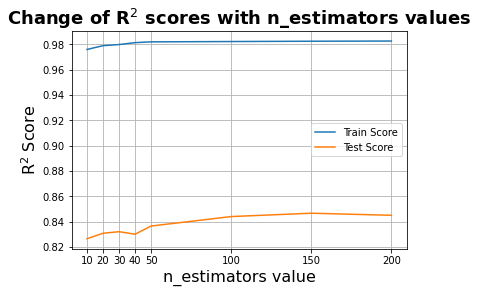

In [ ]:
plt.plot(estimators_rf, rf_scores2['Train Score'], label = 'Train Score')
plt.plot(estimators_rf, rf_scores2['Test Score'], label = 'Test Score')
plt.xlabel('n_estimators value', fontsize = 16)
plt.ylabel('R$^2$ Score', fontsize = 16)
plt.title('Change of R$^2$ scores with n_estimators values', fontweight = 'bold', fontsize = 18)
plt.xticks(estimators_rf)
plt.grid()
plt.legend()

In [ ]:
rf_scores2 = rf_scores2.sort_values(by = 'Test Score', ascending = False)
rf_scores2.head()

Train Score Test Score
150    0.982519   0.846774
200    0.982662   0.845139
100    0.982268   0.844132
50     0.982015   0.836657
30     0.979897   0.832187

## Optimized Model

In [ ]:
rf_opt = RandomForestRegressor(random_state = 42, n_estimators = 150, max_depth= 15)
rf_opt_pipe = make_pipeline(scaler, rf_opt)
rf_opt_pipe.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=15, n_estimators=150,
                                       random_state=42))])

In [ ]:
#evaluvation of optimized bagged tree model
eval_model(rf_opt_pipe)

Metrics Train Score Test Score
1     MAE    0.575588    1.55109
2     MSE    0.834676   7.037439
3    RMSE    0.913606   2.652817
4      R2    0.982519   0.846774

(<Figure size 864x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f023626e250>,
       dtype=object))

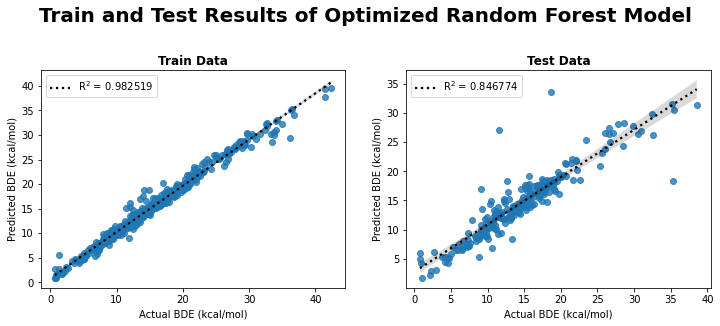

In [ ]:
train_test_plot('Optimized Random Forest Model', rf_opt_pipe)